# Tugas 2 : Membuat VSM dengan isi TF-IDF

Pada Tugas 2 diminta untuk membuat sebuah tabel dengan bentuk VSM (Vector Space Model) yang berisi TF-IDF (Term Frequency - Inverse Document Frequency). Dengan begitu hasil tabel hanya akan berisi angka TF-IDF dari kata unik yang bermunculan dari semua dokumen.

Dibuat Oleh:

*   Nama : Sabil Ahmad Hidayat
*   NIM : 220411100058
*   Kelas : PPW A

Link Code : https://colab.research.google.com/drive/1iDKPIIzDcMN_-u0IY5GfgYY64HoAd2oQ?usp=sharing

Link Github : https://github.com/meinhere/ppw/tree/master/publish/tugas-2

## Vector Space Model (VSM)

Vector Space Model (VSM) adalah metode natural yang bergantung pada vektor dari setiap kata dalam dimensi spasial tertentu. Pada VSM, sebuah kata diwakili dengan dimensi dari ruang vektor. Dokumen dilihat sebagai vektor dengan magnitude (jarak) dan direction (arah). Kompatibilitas vektor dokumen dan kueri menentukan relevansinya dengan kueri.

VSM memungkinkan sebuah kerangka pencocokan parsial. Ini dicapai melalui penerapan bobot non-biner pada istilah indeks dalam dokumen dan kueri. Bobot istilah yang akhirnya digunakan untuk mengevaluasi tingkat kesamaan antara permintaan pengguna dan setiap dokumen yang tersimpan dalam sistem. Model vektor mempertimbangkan dokumen yang relevan dengan permintaan pengguna dan menyortir dokumen yang diambil dalam urutan yang memiliki kemiripan. Hasilnya, kumpulan dokumen yang dikumpulkan jauh lebih akurat. Vektor t-dimensi menunjukkan dokumen dj dan query q.

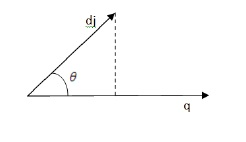

Misalnya kita memiliki sebuah dokumen D dalam ruang vektor VS. Jumlah dimensi atau kolom untuk setiap dokumen akan menjadi jumlah total istilah atau kata yang berbeda untuk semua dokumen dalam ruang vektor.

\begin{align}
    VS={W_1,W_2,...,W_n}
\end{align}

Dimana terdapat n kata yang berbeda di semua dokumen. Contoh representasi setiap dokumen D

\begin{align}
    D={w_1,w_2,...,w_n}
\end{align}

Di dalam wn, menunjukkan bobot untuk kata n dalam dokumen D. nilai dari wn dapat berupa:

*   frekuensi kata tersebut dalam dokumen (term frequency),
*   weight embedding
*   bobot TF-IDF

## Term Frequency - Inverse Document Frequency (TF-IDF)


### Term Frequency

Term Frequency merupakan banyaknya kemunculan kata pada dokumen.

### Inverse Document Frequency

IDF berfungsi mengurangi bobot suatu term jika kemunculannya banyak tersebar diseluruh dokumen, dituliskan dalam bentuk,

\begin{align}
    idf(w,D)=1+log\frac{N}{1+df(w)}
\end{align}

*   df(w): banyaknya dokumen yang mengandung kata tersebut
*   N: jumlah dokumen

## Term Frequency - Inverse Document Frequency

\begin{align}
    tfidf=tf \times idf
\end{align}

## Proses Pembentukan data ke bentuk VSM (Vector Space Model)

### Persiapan Library

In [ ]:
!pip install -q Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
# library awal untuk perhitungan dan pengolahan teks
import numpy as np
import re
import pandas as pd
import pickle

# monitoring
from tqdm import tqdm

# library untuk praproses teks
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split

# library untuk proses pembentukan vsm
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Dikarenakan pada praproses teks akan melakukan stemming, maka perlu dilakukan install library **Sastrawi** terlebih dahulu untuk melakukan stemming bahasa indonesia.

**numpy** digunakan untuk pengolahan angka dan perhitungan matematik

**re (regular expression)** digunakan untuk mengenali pola kata/kalimat

**nltk (natural language toolkit)** berfungsi untuk melakukan proses yang berkaitan dengan bahasa (teks).

**sklearn** digunakan dalam pemrosesan data untuk kebutuhan machine learning atau data science. Dalam tugas ini, menggunakan **TfidfVectorizer** untuk menghitung Term Frequency dan Inverse Document

### Load Data

In [ ]:
main_df = pd.read_csv('https://raw.githubusercontent.com/meinhere/ppw/master/publish/tugas-2/dataset/data_berita.csv', delimiter=',')
main_df

,No,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita
0,1,Simak Jadwal dan Lokasi SIM Keliling di Jakart...,"JAKARTA, KOMPAS.com - Surat Izin Mengemudi (S...",07/09/2024,OTOMOTIF
1,2,[POPULER OTOMOTIF] Diskon Motor Honda Septembe...,"JAKARTA, KOMPAS.com - Banyak pembaca yang ingi...",07/09/2024,OTOMOTIF
2,3,"Cek Saldo Minimal BRI, BNI, BCA, Mandiri, dan BSI","JAKARTA, KOMPAS.com - Penting bagi calon nasab...",06/09/2024,MONEY
3,4,"KAI Uji Coba Teknologi ""Face Recognition Board...",KOMPAS.com - PT Kereta Api Indonesia (KAI) Div...,06/09/2024,MONEY
4,5,OJK Blokir 10.890 Entitas Keuangan Ilegal Seja...,"JAKARTA, KOMPAS.com - Otoritas Jasa Keuangan (...",06/09/2024,MONEY
...,...,...,...,...,...
95,96,Waspada Masalah yang Timbul akibat Telat Ganti...,"JAKARTA, KOMPAS.com - Oli mesin pada mobil den...",06/09/2024,OTOMOTIF
96,97,"Sosok Faisal Basri di Mata Para Tokoh, Ekonom ...","JAKARTA, KOMPAS.com - Ekonom senior Faisal Bas...",06/09/2024,MONEY
97,98,"Pendaftaran CPNS Diperpanjang 4 Hari, Pelamar ...","JAKARTA, KOMPAS.com - Pemerintah telah memperp...",06/09/2024,MONEY
98,99,"Harga Emas Terbaru Pegadaian, Jumat 6 Septembe...","JAKARTA, KOMPAS.com - Pegadaian menyediakan be...",06/09/2024,MONEY


### Praproses Teks

#### Membuat Fungsi

In [ ]:
# Case Folding
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr

# Menghapus tanda baca, angka, dan simbol
def clean_punct(text):
    clean_spcl = re.compile('[/(){}\[\]\|@,;_]')
    clean_symbol = re.compile('[^0-9a-z]')
    clean_number = re.compile('[0-9]')
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    text = clean_number.sub('', text)
    return text

# Menghaps double atau lebih whitespace
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")

# Menghapus stopwords
def clean_stopwords(text):
    stopword = set(stopwords.words('indonesian'))
    text = ' '.join(word for word in text.split() if word not in stopword) # hapus stopword dari kolom deskripsi
    return text

# Stemming with Sastrawi
def sastrawistemmer(text):
    factory = StemmerFactory()
    st = factory.create_stemmer()
    text = ' '.join(st.stem(word) for word in tqdm(text.split()) if word in text)
    return text

function **clean_lower** digunakan untuk merubah semua kata atau huruf menjadi huruf kecil semua

function **clean_punct** digunakan untuk menghapus karakter, simbol, dan angka

function **_normalize_whitespace** digunakan untuk menghapus spasi yang double atau lebih dari 2 spasi

function **clean_stopwords** digunakan untuk menghilangkan kata yang tidak perlu (kata hubung, kata tambahan dll)

function **sastrawistemmer** digunakan untuk proses stemming (mendapatkan kata dasar dari suatu kata)

#### Clean Lower

In [ ]:
# Buat kolom tambahan untuk data description yang telah dilakukan proses case folding
main_df['lwr'] = main_df['Isi Berita'].apply(clean_lower)
casefolding=pd.DataFrame(main_df['lwr'])
casefolding

,lwr
0,"jakarta, kompas.com - surat izin mengemudi (s..."
1,"jakarta, kompas.com - banyak pembaca yang ingi..."
2,"jakarta, kompas.com - penting bagi calon nasab..."
3,kompas.com - pt kereta api indonesia (kai) div...
4,"jakarta, kompas.com - otoritas jasa keuangan (..."
...,...
95,"jakarta, kompas.com - oli mesin pada mobil den..."
96,"jakarta, kompas.com - ekonom senior faisal bas..."
97,"jakarta, kompas.com - pemerintah telah memperp..."
98,"jakarta, kompas.com - pegadaian menyediakan be..."


#### Clean Punct

In [ ]:
# Buat kolom tambahan untuk data description yang telah dilakukan proses penghapusan tanda baca
main_df['clean_punct'] = main_df['lwr'].apply(clean_punct)
main_df['clean_punct']

,clean_punct
0,jakarta kompas com surat izin mengemudi sim...
1,jakarta kompas com banyak pembaca yang ingin...
2,jakarta kompas com penting bagi calon nasaba...
3,kompas com pt kereta api indonesia kai divre...
4,jakarta kompas com otoritas jasa keuangan oj...
...,...
95,jakarta kompas com oli mesin pada mobil deng...
96,jakarta kompas com ekonom senior faisal basr...
97,jakarta kompas com pemerintah telah memperpa...
98,jakarta kompas com pegadaian menyediakan ber...


#### Normalize Whitespace

In [ ]:
main_df['clean_double_ws'] = main_df['clean_punct'].apply(_normalize_whitespace)
main_df['clean_double_ws']

,clean_double_ws
0,jakarta kompas com surat izin mengemudi sim wa...
1,jakarta kompas com banyak pembaca yang ingin t...
2,jakarta kompas com penting bagi calon nasabah ...
3,kompas com pt kereta api indonesia kai divre i...
4,jakarta kompas com otoritas jasa keuangan ojk ...
...,...
95,jakarta kompas com oli mesin pada mobil dengan...
96,jakarta kompas com ekonom senior faisal basri ...
97,jakarta kompas com pemerintah telah memperpanj...
98,jakarta kompas com pegadaian menyediakan berba...


#### Clean Stopwords

In [ ]:
# Buat kolom tambahan untuk data description yang telah dilakukan proses penghapusan stopwords
main_df['clean_sw'] = main_df['clean_double_ws'].apply(clean_stopwords)
main_df['clean_sw']

,clean_sw
0,jakarta kompas com surat izin mengemudi sim wa...
1,jakarta kompas com pembaca diskon motor honda ...
2,jakarta kompas com calon nasabah saldo minimal...
3,kompas com pt kereta api indonesia kai divre i...
4,jakarta kompas com otoritas jasa keuangan ojk ...
...,...
95,jakarta kompas com oli mesin mobil transmisi c...
96,jakarta kompas com ekonom senior faisal basri ...
97,jakarta kompas com pemerintah memperpanjang pe...
98,jakarta kompas com pegadaian menyediakan jenis...


#### Stemming dengan Sastrawi

In [ ]:
# Buat kolom tambahan untuk data description yang telah dilemmatization
main_df['desc_clean_stem'] = main_df['clean_sw'].apply(sastrawistemmer)
main_df['desc_clean_stem']

100%|██████████| 103/103 [00:02<00:00, 42.34it/s]


,desc_clean_stem
0,jakarta kompas com surat izin kemudi sim wajib...
1,jakarta kompas com baca diskon motor honda sep...
2,jakarta kompas com calon nasabah saldo minimal...
3,kompas com pt kereta api indonesia kai divre i...
4,jakarta kompas com otoritas jasa uang ojk blok...
...,...
95,jakarta kompas com oli mesin mobil transmisi c...
96,jakarta kompas com ekonom senior faisal basri ...
97,jakarta kompas com perintah panjang daftar sel...
98,jakarta kompas com gadai sedia jenis emas bata...


### Save Data Praproses

In [ ]:
main_df.to_csv("data_berita_praproses.csv", index=False)

### Split Data Train dan Test

In [ ]:
# Load data berita praproses
data_berita_praproses = pd.read_csv('https://raw.githubusercontent.com/meinhere/ppw/master/publish/tugas-2/dataset/data_berita_praproses.csv')

# membuat kolom 'desc_clean_stem' menjadi fitur
# dan kolom 'Kategori Berita' menjadi target
X = data_berita_praproses['desc_clean_stem']
y = data_berita_praproses['Kategori Berita']

# membagi data menjadi train 80% dan test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# membuat dataframe
train_df = pd.DataFrame({'desc_clean_stem': X_train, 'label': y_train})
test_df = pd.DataFrame({'desc_clean_stem': X_test, 'label': y_test})

# menampilkan dataframe
train_df

,desc_clean_stem,label
55,jakarta kompas com wakil presiden wapres ma ru...,MONEY
88,jakarta kompas com pt layar nasional indonesia...,MONEY
26,jakarta kompas com kuota subsidi sepeda motor ...,OTOMOTIF
42,jakarta kompas com milik honda vario ganti tin...,OTOMOTIF
69,jakarta kompas com pt hutama karya persero tut...,OTOMOTIF
...,...,...
60,jakarta kompas com pt toyota astra motor tam r...,OTOMOTIF
71,jakarta kompas com gac aion umum unit mobil ai...,OTOMOTIF
14,jakarta kompas com viral media sosial fenomena...,OTOMOTIF
92,klaten kompas com kendala mesin mobil muncul o...,OTOMOTIF


### Save Data Train dan Test

In [ ]:
train_df.to_csv("train_df.csv", index=False)

test_df.to_csv("test_df.csv", index=False)

### Pembentukan Vector Space Model

#### Fitting kata untuk mendapatkan Term Frequency-Inverse Document Frequency pada semua Dokumen

In [ ]:
vectorizer = TfidfVectorizer()
corpus = train_df['desc_clean_stem'].tolist()
tfidf = vectorizer.fit_transform(corpus)

print("Shape:", tfidf.shape)

Shape: (80, 3106)


#### Saving Pipeline

In [ ]:
# Save the vectorizer to a file
filename = 'tfidf_vectorizer.sav'
pickle.dump(vectorizer, open(filename, 'wb'))

#### Pembuatan DataFrame

In [ ]:
vocabulary = vectorizer.get_feature_names_out().tolist()

tfidf_df = pd.DataFrame(tfidf.toarray(), columns=vocabulary)
tfidf_df['label'] = train_df['label'].tolist()

tfidf_df

,aaion,aali,abadi,abai,abenkh,abnormal,absurd,ac,acara,access,...,yzr,za,zad,zaman,zarco,zenix,zero,zigzag,zona,label
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058149,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,MONEY
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,MONEY
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,OTOMOTIF
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,OTOMOTIF
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,OTOMOTIF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,OTOMOTIF
76,0.053854,0.0,0.0,0.0,0.0,0.0,0.0,0.037974,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,OTOMOTIF
77,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,OTOMOTIF
78,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.121219,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,OTOMOTIF


## Simpan ke dalam CSV

In [ ]:
tfidf_df.to_csv('train_df_tfidf.csv', index=False)